In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\car_data (1).csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


PART 1

In [7]:
x=df[['Mileage']]
y=df[['Price']]

In [8]:
linreg=linear_model.LinearRegression()
linreg.fit(x,y)

print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x,y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


Text(0.5, 1.0, 'Mileage VS Price')

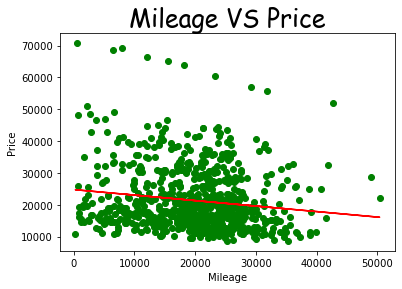

In [14]:
plt.scatter(x,y,color='g')
plt.plot(x,linreg.predict(x),color='r')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage VS Price',fontdict={'fontname':'comic sans MS','fontsize':25})

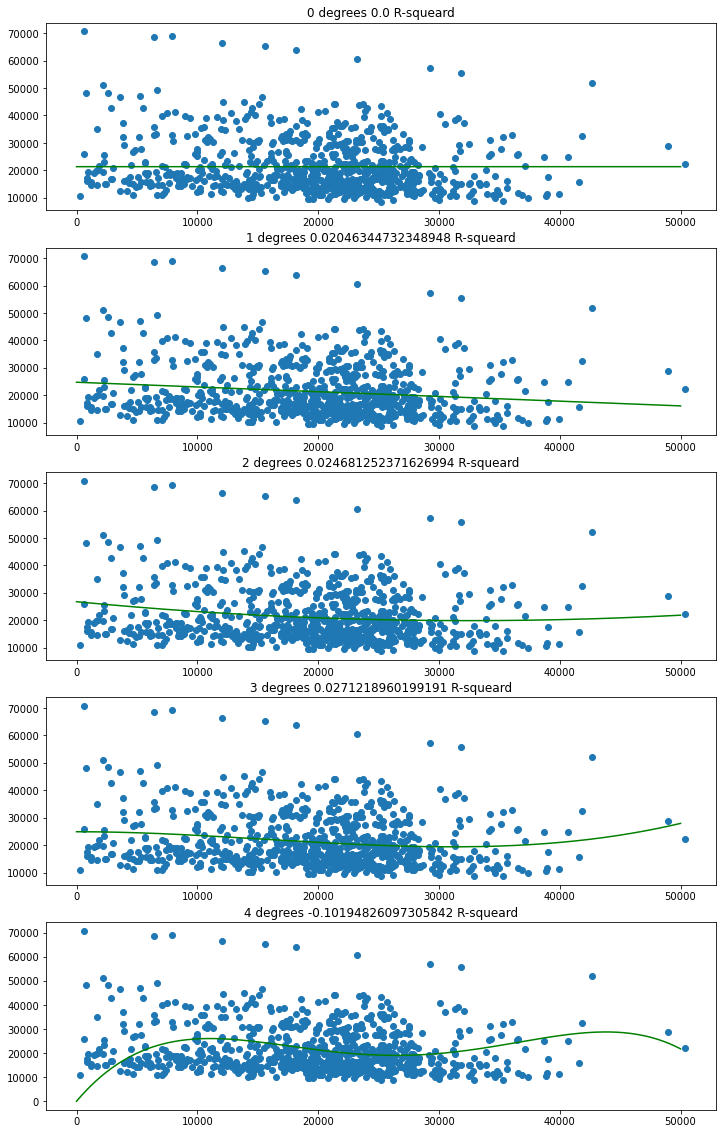

In [15]:
degrees = 5
fig, axs = plt.subplots(degrees, figsize = (12, 20))

for degree in range(degrees):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', linear_model.LinearRegression(fit_intercept=False))])

    points = 50000


    model = model.fit(x, y)
    model_score = model.score(x,y)

    subplot = axs[degree]
    subplot.plot(model.predict([[j] for j in range(points)]), color='g')
    subplot.scatter(x, y)
    subplot.set_title('{} degrees {} R-squeard'.format(degree, model_score))

plt.show()

In [16]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
y = df[['Price']]

In [17]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [18]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.446264353672838


Combination of factors

In [19]:
combinations = []
for x in range(1,8):
    combinations.append(itertools.combinations(feature, x))

In [27]:
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = df[feature]
        linreg = linear_model.LinearRegression()